# Direct Monte Carlo Methods
Jakub Dawidowicz
## Calculating equations of state for real gases



Virial equation:

$$ Z = \frac{pV}{nRT} = 1+ B2(\frac{n}{V}) + B3(\frac{n}{V}) + ... $$

Lennard-Jones 12-6 potential:

$$ U(r) = 4e[(\frac{\sigma}{r})^{12} - (\frac{\sigma}{r})^{6}] $$

f(r):

$$ f(r) = 1 - e^{-U(r)/kT}r^{2} $$



## Task 1: Plot U(r) and f(r)



In [1]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

pi = np.pi
gas_dict = {
    'nitrogen' : {
        'epsilon' : 0.132*10**-22,
        'sigma': 3.75
    },
    'argon' : {
        'epsilon' : 1.66*10**-22,
        'sigma' : 2.56
    },
    'xenon' : {
        'epsilon' : 3.04*10**-22,
        'sigma' : 4.07
    },
    'helium' : {
        'epsilon' : 1.41*10**-22, #Joules
        'sigma': 2.56 #Angstroms
    }
}
#small function to fetch epsilon and sigma from dict of gases
def gas_select(gas_name: str):

    sigma = gas_dict[gas_name]['sigma']
    epsilon = gas_dict[gas_name]['epsilon']
    return epsilon, sigma



def U(r):
    return 4*epsilon*((sigma/r)**(12)-(sigma/r)**(6))

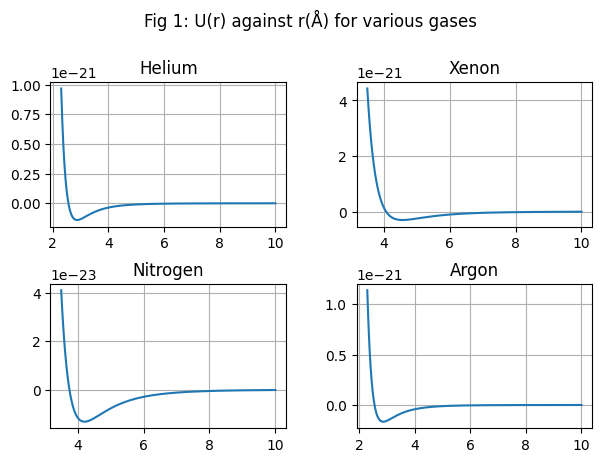

In [2]:

r = np.linspace(2.3, 10, 1000)
figs, axs = plt.subplots(2,2)
figs.suptitle('Fig 1: U(r) against r(Å) for various gases')
figs.tight_layout(pad= 2.0)
epsilon, sigma = gas_select('helium')
axs[0,0].plot(r, U(r))
axs[0,0].set_title('Helium')
axs[0,0].grid()

r= np.linspace(3.5, 10, 1000)
epsilon, sigma = gas_select('nitrogen')
axs[1,0].plot(r, U(r))
axs[1,0].set_title('Nitrogen')
axs[1,0].grid()

r= np.linspace(2.3, 10, 1000)
epsilon, sigma = gas_select('argon')
axs[1,1].plot(r, U(r))
axs[1,1].set_title('Argon')
axs[1,1].grid()

r= np.linspace(3.5, 10, 1000)
epsilon, sigma = gas_select('xenon')
axs[0,1].plot(r, U(r))
axs[0,1].set_title('Xenon')
axs[0,1].grid()

/var/folders/9k/ymvm_q_s41xcn2jpwvn64gz80000gn/T/ipykernel_6892/471410427.py:35: RuntimeWarning: divide by zero encountered in divide
  return 4*epsilon*((sigma/r)**(12)-(sigma/r)**(6))
/var/folders/9k/ymvm_q_s41xcn2jpwvn64gz80000gn/T/ipykernel_6892/471410427.py:35: RuntimeWarning: invalid value encountered in subtract
  return 4*epsilon*((sigma/r)**(12)-(sigma/r)**(6))


(0.0, 20.0)

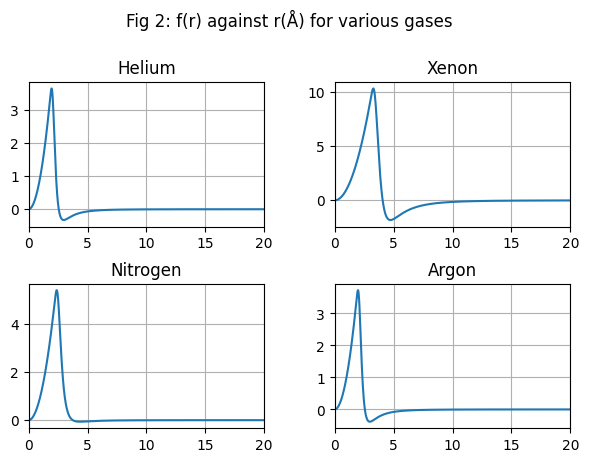

In [3]:
def f(r):
    k = 1.380649 * 10 ** -23
    T = 273
    return (1-np.exp(-U(r)/(k*T)))*r**2

r = np.linspace(0, 20, 1000)
figs, axs = plt.subplots(2,2)
figs.suptitle('Fig 2: f(r) against r(Å) for various gases')
figs.tight_layout(pad= 2.0)
epsilon, sigma = gas_select('helium')
axs[0,0].plot(r, f(r))
axs[0,0].set_title('Helium')
axs[0,0].grid()
axs[0,0].set_xlim(0,20)


epsilon, sigma = gas_select('nitrogen')
axs[1,0].plot(r, f(r))
axs[1,0].set_title('Nitrogen')
axs[1,0].grid()
axs[1,0].set_xlim(0,20)

epsilon, sigma = gas_select('argon')
axs[1,1].plot(r, f(r))
axs[1,1].set_title('Argon')
axs[1,1].grid()
axs[1,1].set_xlim(0,20)

epsilon, sigma = gas_select('xenon')
axs[0,1].plot(r, f(r))
axs[0,1].set_title('Xenon')
axs[0,1].grid()
axs[0,1].set_xlim(0,20)

## Task 2: Calculate B2 where:

$$ B_{2} = 2π \int_{0}^\infty (1 − e^{−U(r)/kT}) r^2 dr $$

Using the direct Monte Carlo method to perform the integral:

In [4]:
def direct_monte_carlo(function, xmax, xmin, ymax, ymin):
    n = 1000000 #number of guesses
    area = (xmax - xmin) * (ymax - ymin)
    s = 0 #increment counter
    for i in range(n):
        rand_x = np.random.rand() * (xmax - xmin) + xmin
        rand_y = np.random.rand() * (ymax - ymin) + ymin
        if rand_y > 0 and rand_y <= function(rand_x):
            s += 1
        if rand_y < 0 and rand_y >= function(rand_x):
            s -=1
    integral_estimate = area * (s/n)     
    return integral_estimate

for gas in gas_dict.keys(): #perform monte carlo for each gas
    epsilon, sigma = gas_select(gas)
    b2 = 2 * pi * direct_monte_carlo(function=f, xmax=20, xmin=0.1e-9, ymax=11, ymin=-0.5)
    print(f'{np.round(b2,2)} angstrom^3 for {gas}')

42.02 angstrom^3 for nitrogen
18.6 angstrom^3 for argon
82.88 angstrom^3 for xenon
18.7 angstrom^3 for helium


## Task 3: Check your result by using numerical integration routine of Python


In [5]:
import scipy.integrate as integrate 
epsilon, sigma = gas_select('helium')
b2n = 2 * pi * integrate.quad(f, 0, 20)[0]
print(b2n, ' for helium')

18.575209005725686  for helium


## Task 4: Compare your result with literature

$ B_{2} $ (Helium) = 11.9257 cm3 mol-1 for $ T = 273 $ K

Gaiser C and Fellmuth B 2019 J. Chem. Phys. 150 134303
@https://aip.scitation.org/doi/full/10.1063/1.5090224




In [6]:
def convert_b2(b2): #from angstroms per atom to cm3 mol-1
    mol = 6.02e23
    ang_to_cm = 1e24
    return b2*mol/ang_to_cm
print(convert_b2(b2), 'cm3 mol-1')

11.254799789390018 cm3 mol-1


We can see that the result achieved using the monte carlo method is very close to accurate literature 

## Task 5: What determines the accuracy of your result?


The accuracy of the result using the direct monte carlo method is mainly affected by the guess 'density', or it's resolution. In the code above this is determined by the amount of guesses taken and the area they are taken in. A low amount of guesses over a large area would lead to a low resolution, whereas a large amount of guesses in a small area would be a high resolution and be much more accurate. 

Ideally, we would have as many guesses as computationally practical and the area would be minimised by using good limits on the integration, and using maxima and minima of the function to determine y(max) and y(min).

Naturally, there could also be error in the initial values for epsilon and sigma for U(r) which would propagate into f(r)

## Task 6: What is the molar volume of He(g) at 600 K and 600 bar according to the (a) ideal gasequation and (b) the virial equation?

Using only the B2 term and rearranging the equation using n = 1 to find a quadratic in V

$$ \frac{pV}{nRT} = 1 + B(\frac{n}{V})$$
n = 1 for molar volume so:

$$ \frac{pV}{RT} = 1 + \frac{B}{V} \newline 
\Downarrow \newline
\frac{pV^{2}}{RT} - V - B = 0
$$

Since the virial coefficients are different at each temperature, we will need to adjust the above calculations for T = 600k

In [7]:
def f(r):
    k = 1.380649 * 10 ** -23
    T = 600
    return (1-np.exp(-U(r)/(k*T)))*r**2

b2 = 2 * pi * direct_monte_carlo(function=f, xmax=20, xmin=0.1e-9, ymax=4, ymin=-0.5)
converted_b2 = convert_b2(b2)
print(converted_b2)

10.634473470385892


substite values:
$$
p = 60*10^6\text{ Pa,  }B =10.47*10^{-6}\text{ m}^{3}\text{mol}^{-1}\text{,  } T = 600\text{K, and } R=8.314 \newline
$$

In [8]:
T = 600
p = 60*10**6
R = 8.314
B = converted_b2 * 10e-6
def ideal_gas_volume(T,p):
    return R * T/p


def virial_volume(V): #using just b2 coefficient from above
    return (p/(R*T)) * V**2 - V - B

roots = scipy.optimize.broyden1(virial_volume,0.1)
print(f'{np.round(roots*10e6, 1)} cm3 for virial volume')
print(f'{ideal_gas_volume(T,p)*10e6} cm3 for ideal gas volume')


1446.2 cm3 for virial volume
831.4 cm3 for ideal gas volume


This appears correct, the answers are of a similair magnitude yet we would expect the gas to behave differently than an ideal gas at such high temperatures and pressures